Lisa Ho Yen Xin 20297507

# [1] Import Functions

## [1.1] Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%run /content/drive/MyDrive/FYP/ImportFunctions.ipynb

## [1.2] Jupyter

In [58]:
%run ImportFunctions.ipynb

# [2] Import Libraries

In [2]:
import cv2
import numpy as np
import seaborn as sns
from keras.utils import plot_model
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_recall_fscore_support,
)
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import tensorflow as tf

# [3] Load Dataset

## [3.1] Google Colab

In [3]:
# Load images and labels
images = np.load('/content/drive/My Drive/FYP/dataset/images.npy')
labels = np.load('/content/drive/My Drive/FYP/dataset/labels.npy')

## [3.2] Jupyter

In [3]:
# Load images and labels
images = np.load('dataset/images.npy')
labels = np.load('dataset/labels.npy')

# [4] Prepare Dataset

In [4]:
images = resize_images(images, (224,224))

In [5]:
# Display array shapes
display_array_shapes(images, labels)

+--------------+--------------------+
| Array Name   | Shape              |
+==============+====================+
| Images       | (941, 224, 224, 3) |
+--------------+--------------------+
| Labels       | (941,)             |
+--------------+--------------------+


In [6]:
# Get the number of unique labels
num_classes = len(np.unique(labels))

print("Number of unique labels:", num_classes)

Number of unique labels: 9


In [7]:
# Binarize labels
labels_binarized = binarize_labels(labels)

# [5] Train Model

In [8]:
# Split the data into training and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels_binarized, test_size=0.2, random_state=42)

# Further split the temporary data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (752, 224, 224, 3) (752, 9)
Validation shape: (94, 224, 224, 3) (94, 9)
Test shape: (95, 224, 224, 3) (95, 9)


## [5.1] VGG-19

In [9]:
# Build and compile VGG19 model
vgg19_model = build_and_compile_vgg19_model(num_classes)

2024-03-22 15:31:35.899063: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-03-22 15:31:35.899096: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LSPMHPCHN01): /proc/driver/nvidia/version does not exist
2024-03-22 15:31:35.899308: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Train the model
vgg19_history = vgg19_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
vgg19_loss, vgg19_accuracy = vgg19_model.evaluate(X_val, y_val)

Epoch 1/10


2024-03-22 15:31:38.085643: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 452788224 exceeds 10% of free system memory.
2024-03-22 15:31:39.103258: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 539492352 exceeds 10% of free system memory.
2024-03-22 15:31:39.188556: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 539492352 exceeds 10% of free system memory.


 1/18 [>.............................] - ETA: 40s - loss: 2.7778 - accuracy: 0.1190

2024-03-22 15:31:40.793758: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 539492352 exceeds 10% of free system memory.
2024-03-22 15:31:40.830404: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 539492352 exceeds 10% of free system memory.


18/18 [==============================] - 26s 1s/step - loss: 2.7624 - accuracy: 0.2473 - val_loss: 2.3749 - val_accuracy: 0.2872
Epoch 2/10
18/18 [==============================] - 23s 1s/step - loss: 1.1799 - accuracy: 0.5918 - val_loss: 1.6325 - val_accuracy: 0.4894
Epoch 3/10
18/18 [==============================] - 23s 1s/step - loss: 0.6337 - accuracy: 0.8245 - val_loss: 1.4235 - val_accuracy: 0.5426
Epoch 4/10
18/18 [==============================] - 23s 1s/step - loss: 0.3568 - accuracy: 0.9348 - val_loss: 1.3428 - val_accuracy: 0.5745
Epoch 5/10
18/18 [==============================] - 23s 1s/step - loss: 0.2555 - accuracy: 0.9707 - val_loss: 1.4180 - val_accuracy: 0.5745
Epoch 6/10
18/18 [==============================] - 23s 1s/step - loss: 0.1696 - accuracy: 0.9894 - val_loss: 1.3439 - val_accuracy: 0.5638
Epoch 7/10
18/18 [==============================] - 23s 1s/step - loss: 0.1297 - accuracy: 0.9987 - val_loss: 1.4146 - val_accuracy: 0.5532
Epoch 8/10
18/18 [=============

In [11]:
# Calculate average loss and accuracy
vgg19_average_loss = sum(vgg19_history.history['val_loss']) / len(vgg19_history.history['val_loss'])
vgg19_average_accuracy = sum(vgg19_history.history['val_accuracy']) / len(vgg19_history.history['val_accuracy'])

print(f"Average Validation Loss: {vgg19_average_loss}, Average Validation Accuracy: {vgg19_average_accuracy}")

Average Validation Loss: 1.5024977922439575, Average Validation Accuracy: 0.5329787164926529


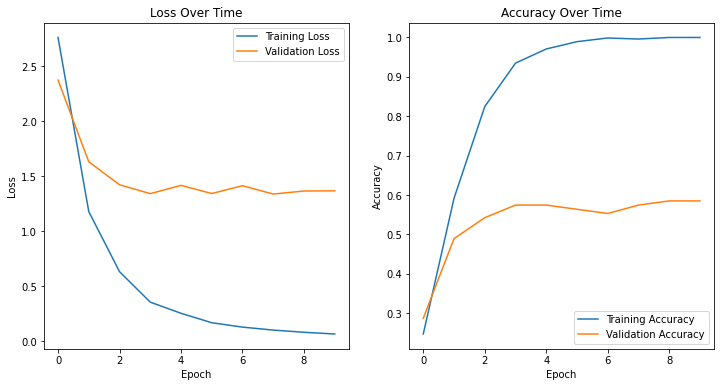

In [12]:
plot_training_history(vgg19_history)

## [5.2] ResNet-101

In [13]:
# Build and compile ResNet101 model
resnet101_model = build_and_compile_resnet101_model(num_classes)

In [14]:
# Train the model
resnet101_history = resnet101_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
resnet101_loss, resnet101_accuracy = resnet101_model.evaluate(X_val, y_val)

Epoch 1/10
18/18 [==============================] - 32s 2s/step - loss: 9.7295 - accuracy: 0.1689 - val_loss: 7.3463 - val_accuracy: 0.1383
Epoch 2/10
18/18 [==============================] - 26s 1s/step - loss: 4.6973 - accuracy: 0.2394 - val_loss: 3.0924 - val_accuracy: 0.2979
Epoch 3/10
18/18 [==============================] - 27s 1s/step - loss: 2.5044 - accuracy: 0.2779 - val_loss: 2.6634 - val_accuracy: 0.3085
Epoch 4/10
18/18 [==============================] - 27s 1s/step - loss: 2.2218 - accuracy: 0.3178 - val_loss: 2.4874 - val_accuracy: 0.2340
Epoch 5/10
18/18 [==============================] - 26s 1s/step - loss: 1.8943 - accuracy: 0.3710 - val_loss: 2.1286 - val_accuracy: 0.2979
Epoch 6/10
18/18 [==============================] - 27s 1s/step - loss: 1.7047 - accuracy: 0.4282 - val_loss: 1.9804 - val_accuracy: 0.3298
Epoch 7/10
18/18 [==============================] - 27s 2s/step - loss: 1.7294 - accuracy: 0.3989 - val_loss: 2.0334 - val_accuracy: 0.2872
Epoch 8/10
18/18 [==

In [15]:
# Calculate average loss and accuracy
resnet101_average_loss = sum(resnet101_history.history['val_loss']) / len(resnet101_history.history['val_loss'])
resnet101_average_accuracy = sum(resnet101_history.history['val_accuracy']) / len(resnet101_history.history['val_accuracy'])

print(f"Average Validation Loss: {resnet101_average_loss}, Average Validation Accuracy: {resnet101_average_accuracy}")

Average Validation Loss: 2.797093451023102, Average Validation Accuracy: 0.28191488832235334


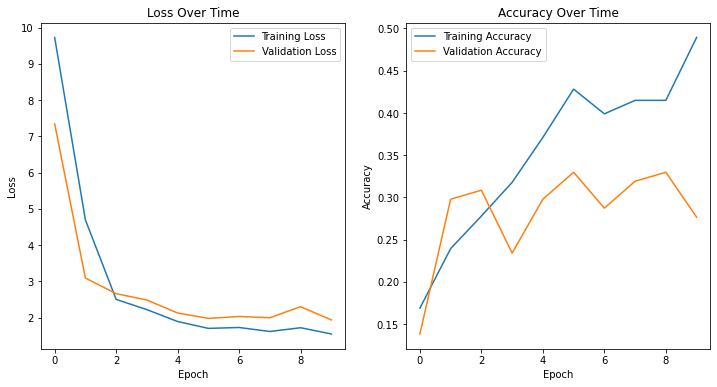

In [16]:
# Plot training history
plot_training_history(resnet101_history)

## [5.3] MobileNetV2

In [17]:
from tensorflow.keras.applications import MobileNetV2

# Build and compile MobileNetV3 model
mobilenetv2_model = build_and_compile_mobilenetv2_model(num_classes)

In [18]:
# Train the model
mobilenetv2_history = mobilenetv2_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
mobilenetv2_loss, mobilenetv2_accuracy = mobilenetv2_model.evaluate(X_val, y_val)

Epoch 1/10
18/18 [==============================] - 9s 331ms/step - loss: 6.8296 - accuracy: 0.4548 - val_loss: 4.3956 - val_accuracy: 0.6277
Epoch 2/10
18/18 [==============================] - 5s 280ms/step - loss: 0.8964 - accuracy: 0.8843 - val_loss: 3.7468 - val_accuracy: 0.6915
Epoch 3/10
18/18 [==============================] - 5s 268ms/step - loss: 0.1365 - accuracy: 0.9774 - val_loss: 3.8244 - val_accuracy: 0.7021
Epoch 4/10
18/18 [==============================] - 5s 267ms/step - loss: 0.0302 - accuracy: 0.9894 - val_loss: 3.3403 - val_accuracy: 0.6702
Epoch 5/10
18/18 [==============================] - 5s 274ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 3.6213 - val_accuracy: 0.7021
Epoch 6/10
18/18 [==============================] - 5s 271ms/step - loss: 6.2381e-04 - accuracy: 1.0000 - val_loss: 3.5536 - val_accuracy: 0.6915
Epoch 7/10
18/18 [==============================] - 5s 266ms/step - loss: 1.3149e-04 - accuracy: 1.0000 - val_loss: 3.5109 - val_accuracy: 0.680

In [19]:
# Calculate average loss and accuracy
mobilenetv2_average_loss = sum(mobilenetv2_history.history['val_loss']) / len(mobilenetv2_history.history['val_loss'])
mobilenetv2_average_accuracy = sum(mobilenetv2_history.history['val_accuracy']) / len(mobilenetv2_history.history['val_accuracy'])

print(f"Average Validation Loss: {mobilenetv2_average_loss}, Average Validation Accuracy: {mobilenetv2_average_accuracy}")

Average Validation Loss: 3.648498272895813, Average Validation Accuracy: 0.6787233829498291


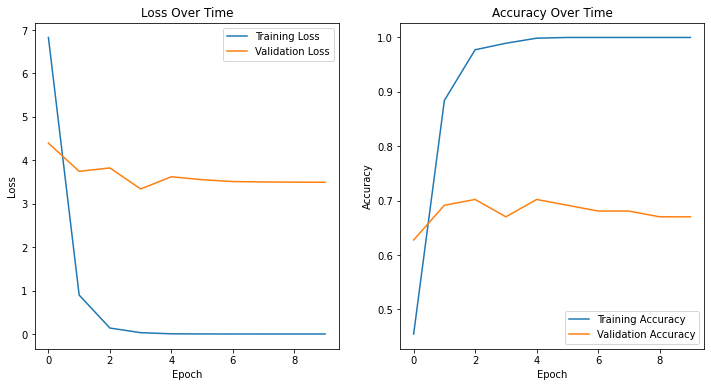

In [20]:
# Plot training history
plot_training_history(mobilenetv2_history)

## [5.4] EfficientNet-B0

In [21]:
from tensorflow.keras.applications import EfficientNetB0

# Build and compile EfficientNet model
efficientnet_model = build_and_compile_efficientnet_model(num_classes)

In [22]:
# Train the model
efficientnet_history = efficientnet_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
efficientnet_loss, efficientnet_accuracy = efficientnet_model.evaluate(X_val, y_val)

Epoch 1/10
18/18 [==============================] - 14s 574ms/step - loss: 12.6227 - accuracy: 0.1343 - val_loss: 7.6821 - val_accuracy: 0.1489
Epoch 2/10
18/18 [==============================] - 9s 476ms/step - loss: 5.9839 - accuracy: 0.1423 - val_loss: 4.3622 - val_accuracy: 0.0319
Epoch 3/10
18/18 [==============================] - 8s 461ms/step - loss: 3.9760 - accuracy: 0.1356 - val_loss: 3.7574 - val_accuracy: 0.0745
Epoch 4/10
18/18 [==============================] - 8s 460ms/step - loss: 3.3727 - accuracy: 0.1343 - val_loss: 3.1083 - val_accuracy: 0.1277
Epoch 5/10
18/18 [==============================] - 8s 459ms/step - loss: 3.0212 - accuracy: 0.1476 - val_loss: 3.0851 - val_accuracy: 0.2447
Epoch 6/10
18/18 [==============================] - 8s 452ms/step - loss: 2.6111 - accuracy: 0.1596 - val_loss: 2.1391 - val_accuracy: 0.2447
Epoch 7/10
18/18 [==============================] - 8s 452ms/step - loss: 2.4257 - accuracy: 0.1769 - val_loss: 2.3144 - val_accuracy: 0.2447
Epoc

In [23]:
# Calculate average loss and accuracy
efficientnet_average_loss = sum(efficientnet_history.history['val_loss']) / len(efficientnet_history.history['val_loss'])
efficientnet_average_accuracy = sum(efficientnet_history.history['val_accuracy']) / len(efficientnet_history.history['val_accuracy'])

print(f"Average Validation Loss: {efficientnet_average_loss}, Average Validation Accuracy: {efficientnet_average_accuracy}")

Average Validation Loss: 3.538383364677429, Average Validation Accuracy: 0.1712765958160162


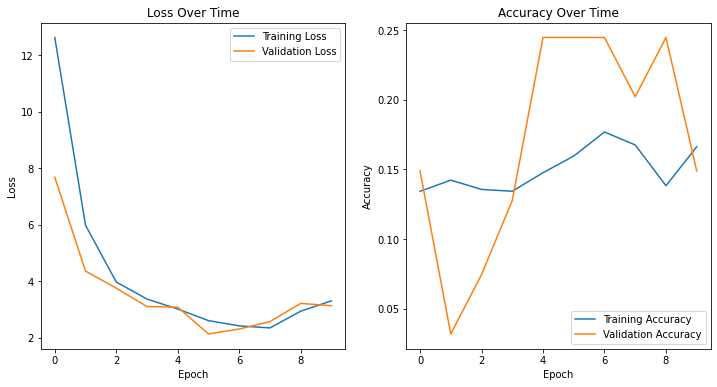

In [24]:
# Plot training history
plot_training_history(efficientnet_history)

# [6] Save Model

## [6.1] Google Colab

In [ ]:
# Save models
vgg19_model.save('/content/drive/MyDrive/FYP/models/VGG19_noAugment')
resnet101_model.save('/content/drive/MyDrive/FYP/models/ResNet101_noAugment')
mobilenetv2_model.save('/content/drive/MyDrive/FYP/models/MobileNetV2_noAugment')
efficientnet_model.save('/content/drive/MyDrive/FYP/models/EfficientNetB0_noAugment')

## [6.2] Jupyter

In [27]:
# Save models
vgg19_model.save('models/VGG19_noAugment')
resnet101_model.save('models/ResNet101_noAugment')
mobilenetv2_model.save('models/MobileNetV2_noAugment')

# Save EfficientNet model in SavedModel format
tf.saved_model.save(efficientnet_model, 'models/EfficientNetB0_noAugment')

INFO:tensorflow:Assets written to: models/VGG19_noAugment/assets


INFO:tensorflow:Assets written to: models/VGG19_noAugment/assets


INFO:tensorflow:Assets written to: models/ResNet101_noAugment/assets


INFO:tensorflow:Assets written to: models/ResNet101_noAugment/assets


INFO:tensorflow:Assets written to: models/MobileNetV2_noAugment/assets


INFO:tensorflow:Assets written to: models/MobileNetV2_noAugment/assets


INFO:tensorflow:Assets written to: models/EfficientNetB0_noAugment/assets


INFO:tensorflow:Assets written to: models/EfficientNetB0_noAugment/assets


# [6] Load Model

## [6.1] Google Colab

In [ ]:
# Load the saved models
loaded_vgg19_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/VGG19_noAugment')
loaded_resnet101_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/ResNet101_noAugment')
loaded_mobilenetv2_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/MobileNetV2_noAugment')
loaded_efficientnet_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/EfficientNetB0_noAugment')

## [6.2] Jupyter

In [28]:
# Load the saved models
loaded_vgg19_model = tf.keras.models.load_model('models/VGG19_noAugment')
loaded_resnet101_model = tf.keras.models.load_model('models/ResNet101_noAugment')
loaded_mobilenetv2_model = tf.keras.models.load_model('models/MobileNetV2_noAugment')
loaded_efficientnet_model = tf.saved_model.load('models/EfficientNetB0_noAugment')

# [7] Test and Analyse

## [7.1] VGG-19

In [29]:
# Evaluate the model on the test data
vgg19_test_loss, vgg19_test_accuracy = loaded_vgg19_model.evaluate(X_test, y_test)
print(f"Test Loss: {vgg19_test_loss}, Test Accuracy: {vgg19_test_accuracy}")

3/3 [==============================] - 4s 1s/step - loss: 0.9453 - accuracy: 0.7053
Test Loss: 0.9453375339508057, Test Accuracy: 0.7052631378173828


In [30]:
vgg19_predicted_labels, vgg19_true_labels_list = make_predictions_and_evaluate(loaded_vgg19_model, X_test, y_test)

3/3 [==============================] - 3s 935ms/step


In [62]:
calculate_classification_metrics(vgg19_true_labels_list, vgg19_predicted_labels)

Accuracy: 0.7053
Precision: 0.6757
Recall: 0.5803
F1 Score: 0.6244


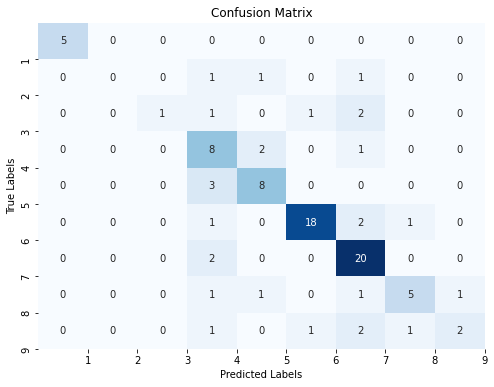

In [32]:
display_confusion_matrix(vgg19_true_labels_list, vgg19_predicted_labels)

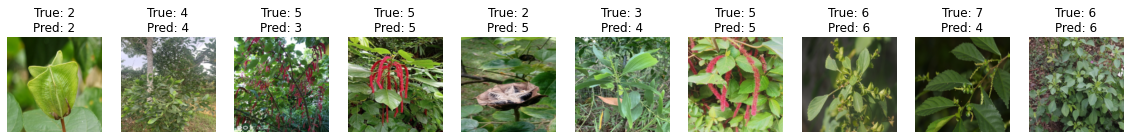

In [54]:
from sklearn.preprocessing import LabelBinarizer

def display_image_predictions(images, true_labels, predicted_labels, label_names=None, num_images=10):
    """
    Display a sample of images with their predicted and true labels.
    
    :param images: The array of images.
    :param true_labels: The true labels for the images.
    :param predicted_labels: The predicted labels for the images.
    :param label_names: Optional; A list of names corresponding to the labels.
    :param num_images: The number of images to display.
    """
    # Randomly select `num_images` images
    indices = np.random.choice(range(len(images)), num_images, replace=False)
    
    plt.figure(figsize=(20, 4))
    for i, index in enumerate(indices):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(images[index])
        if label_names is not None:
            true_label = label_names[true_labels[index]]
            predicted_label = label_names[predicted_labels[index]]
        else:
            true_label = true_labels[index]
            predicted_label = predicted_labels[index]
        
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis("off")
    plt.show()

# Convert true labels list to numpy array for indexing
vgg19_true_labels_array = np.array(vgg19_true_labels_list)

# Call the function 
display_image_predictions(X_test, vgg19_true_labels_array, vgg19_predicted_labels, num_images=10)


## [7.2] ResNet-101

In [33]:
# Evaluate the model on the test data
resnet101_test_loss, resnet101_test_accuracy = loaded_resnet101_model.evaluate(X_test, y_test)
print(f"Test Loss: {resnet101_test_loss}, Test Accuracy: {resnet101_test_accuracy}")

3/3 [==============================] - 3s 780ms/step - loss: 2.1091 - accuracy: 0.3158
Test Loss: 2.1090705394744873, Test Accuracy: 0.31578946113586426


In [34]:
resnet101_predicted_labels, resnet101_true_labels_list = make_predictions_and_evaluate(loaded_resnet101_model, X_test, y_test)

3/3 [==============================] - 3s 778ms/step


In [61]:
calculate_classification_metrics(resnet101_true_labels_list, resnet101_predicted_labels)

Accuracy: 0.3158
Precision: 0.2042
Recall: 0.2040
F1 Score: 0.2041


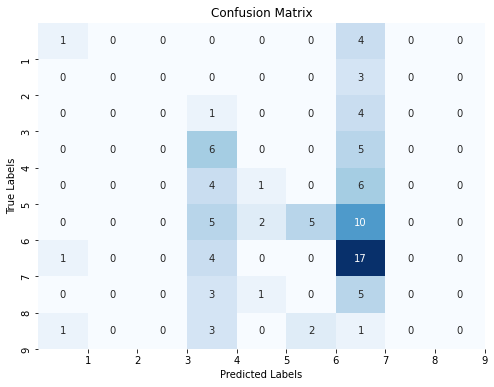

In [36]:
display_confusion_matrix(resnet101_true_labels_list, resnet101_predicted_labels)

## [7.3] MobileNetV2

In [37]:
# Evaluate the model on the test data
mobilenetv2_test_loss, mobilenetv2_test_accuracy = loaded_mobilenetv2_model.evaluate(X_test, y_test)
print(f"Test Loss: {mobilenetv2_test_loss}, Test Accuracy: {mobilenetv2_test_accuracy}")

3/3 [==============================] - 1s 144ms/step - loss: 2.2077 - accuracy: 0.7474
Test Loss: 2.207707405090332, Test Accuracy: 0.7473683953285217


In [38]:
mobilenetv2_predicted_labels, mobilenetv2_true_labels_list = make_predictions_and_evaluate(loaded_mobilenetv2_model, X_test, y_test)

3/3 [==============================] - 1s 176ms/step


In [60]:
calculate_classification_metrics(mobilenetv2_true_labels_list, mobilenetv2_predicted_labels)

Accuracy: 0.7474
Precision: 0.8399
Recall: 0.6643
F1 Score: 0.7418


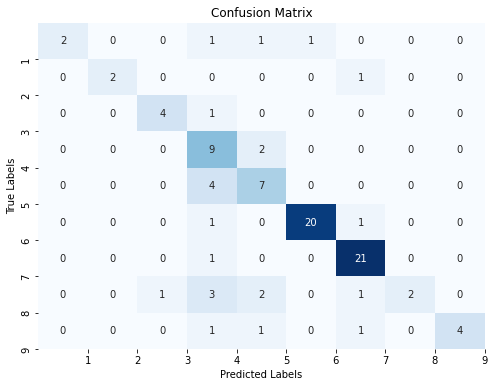

In [40]:
display_confusion_matrix(mobilenetv2_true_labels_list, mobilenetv2_predicted_labels)

## [7.4] EfficientNet-B0

In [41]:
# Extract the 'serving_default' signature
signature = loaded_efficientnet_model.signatures['serving_default']

# Get the inference function or model signature
infer = signature

# Convert input data to float32 if it's not already
efficientnet_X_test = X_test.astype(np.float32)

# Perform evaluation on test data
output = infer(tf.constant(efficientnet_X_test))
predictions = output[list(output.keys())[0]]  # Adjust this based on the output key of your model

# Convert probabilities to class labels (assuming one-hot encoding)
efficientnet_predicted_labels = np.argmax(predictions, axis=1)

# Convert true labels to class labels (assuming one-hot encoding)
efficientnet_true_labels = np.argmax(y_test, axis=1)

# Calculate test loss
efficientnet_test_loss = tf.keras.losses.categorical_crossentropy(y_test, predictions).numpy().mean()

# Calculate evaluation metrics (e.g., accuracy)
efficientnet_test_accuracy = np.mean(efficientnet_predicted_labels == efficientnet_true_labels)
print(f"Test Loss: {efficientnet_test_loss}, Test Accuracy: {efficientnet_test_accuracy}")

Test Loss: 2.7922990322113037, Test Accuracy: 0.11578947368421053


In [59]:
calculate_classification_metrics(efficientnet_true_labels, efficientnet_predicted_labels)

Accuracy: 0.1158
Precision: 0.0129
Recall: 0.1111
F1 Score: 0.0231


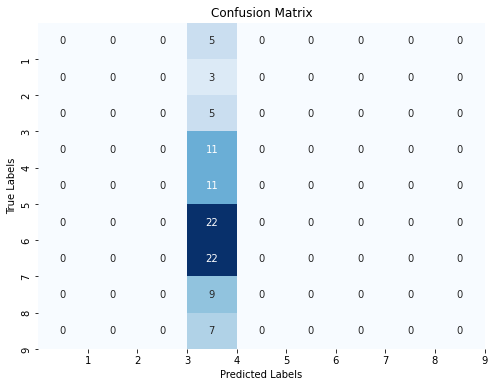

In [43]:
display_confusion_matrix(efficientnet_true_labels, efficientnet_predicted_labels)

In [ ]:
import matplotlib.pyplot as plt

# Define a function to display images with labels
def display_images(images, true_labels, predicted_labels):
    # Define the number of images to display
    num_images = len(images)

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 3))

    # Iterate through images
    for i in range(num_images):
        # Display the image
        axes[i].imshow(images[i])
        axes[i].axis('off')
        
        # Set the title with true and predicted labels
        title = f'True: {true_labels[i]}\nPredicted: {predicted_labels[i]}'
        axes[i].set_title(title)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Display the images with their true and predicted labels
display_images(vgg19_X_test[:10], true_labels[:10], predicted_labels[:10])
